### Importing the neccesary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from pathlib import Path

### 1. Data Inspection
#### overview the data set

In [2]:
# Loading the data set and print first 5
train_df= pd.read_csv('Airqo.csv')
train_df.head()


,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


#### Get the information and the descriptive statistics of the data set

In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


### 2. Data Cleaning 
#### Checking the null cell and the percentage

In [4]:
train_df.isnull().sum()

id                               0
site_id                          0
site_latitude                    0
site_longitude                   0
city                             0
                              ... 
cloud_sensor_azimuth_angle    3077
cloud_sensor_zenith_angle     3077
cloud_solar_azimuth_angle     3077
cloud_solar_zenith_angle      3077
pm2_5                            0
Length: 80, dtype: int64

#### Calculating the percentage of the empty cell in each column

In [5]:
nullPercent=(train_df.isnull().sum()/len(train_df))*100
nullPercent[50:78]

uvaerosolindex_solar_azimuth_angle             0.061950
uvaerosolindex_solar_zenith_angle              0.061950
ozone_o3_column_number_density                 1.387684
ozone_o3_column_number_density_amf             1.387684
ozone_o3_slant_column_number_density           1.387684
ozone_o3_effective_temperature                 1.387684
ozone_cloud_fraction                           1.387684
ozone_sensor_azimuth_angle                     1.387684
ozone_sensor_zenith_angle                      1.387684
ozone_solar_azimuth_angle                      1.387684
ozone_solar_zenith_angle                       1.387684
uvaerosollayerheight_aerosol_height           94.709454
uvaerosollayerheight_aerosol_pressure         94.709454
uvaerosollayerheight_aerosol_optical_depth    94.709454
uvaerosollayerheight_sensor_zenith_angle      94.709454
uvaerosollayerheight_sensor_azimuth_angle     94.709454
uvaerosollayerheight_solar_azimuth_angle      94.709454
uvaerosollayerheight_solar_zenith_angle       94

#### Getting the names of columns to be considered

In [6]:
allColumns=[i for i in train_df.columns]
column_to_be_considered=[col for col in allColumns if nullPercent[col]<60]
print(column_to_be_considered)


['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country', 'date', 'hour', 'month', 'carbonmonoxide_co_column_number_density', 'carbonmonoxide_h2o_column_number_density', 'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude', 'carbonmonoxide_sensor_azimuth_angle', 'carbonmonoxide_sensor_zenith_angle', 'carbonmonoxide_solar_azimuth_angle', 'carbonmonoxide_solar_zenith_angle', 'formaldehyde_tropospheric_hcho_column_number_density', 'formaldehyde_tropospheric_hcho_column_number_density_amf', 'formaldehyde_hcho_slant_column_number_density', 'formaldehyde_cloud_fraction', 'formaldehyde_solar_zenith_angle', 'formaldehyde_solar_azimuth_angle', 'formaldehyde_sensor_zenith_angle', 'formaldehyde_sensor_azimuth_angle', 'uvaerosolindex_absorbing_aerosol_index', 'uvaerosolindex_sensor_altitude', 'uvaerosolindex_sensor_azimuth_angle', 'uvaerosolindex_sensor_zenith_angle', 'uvaerosolindex_solar_azimuth_angle', 'uvaerosolindex_solar_zenith_angle', 'ozone_o3_column_number_density

#### Getting the names of column we need to drop its rows

In [7]:
column_to_be_dropped=[col for col in allColumns if nullPercent[col]<5]
print(column_to_be_dropped)

['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country', 'date', 'hour', 'month', 'uvaerosolindex_absorbing_aerosol_index', 'uvaerosolindex_sensor_altitude', 'uvaerosolindex_sensor_azimuth_angle', 'uvaerosolindex_sensor_zenith_angle', 'uvaerosolindex_solar_azimuth_angle', 'uvaerosolindex_solar_zenith_angle', 'ozone_o3_column_number_density', 'ozone_o3_column_number_density_amf', 'ozone_o3_slant_column_number_density', 'ozone_o3_effective_temperature', 'ozone_cloud_fraction', 'ozone_sensor_azimuth_angle', 'ozone_sensor_zenith_angle', 'ozone_solar_azimuth_angle', 'ozone_solar_zenith_angle', 'pm2_5']


#### Extracting the needed columns and droping the necessary rows

In [29]:
working_data=train_df[column_to_be_considered]
working_data.dropna(subset=column_to_be_dropped, inplace=True)
print(working_data.isnull().sum())

id                                                             0
site_id                                                        0
site_latitude                                                  0
site_longitude                                                 0
city                                                           0
country                                                        0
date                                                           0
hour                                                           0
month                                                          0
carbonmonoxide_co_column_number_density                     3541
carbonmonoxide_h2o_column_number_density                    3541
carbonmonoxide_cloud_height                                 3541
carbonmonoxide_sensor_altitude                              3541
carbonmonoxide_sensor_azimuth_angle                         3541
carbonmonoxide_sensor_zenith_angle                          3541
carbonmonoxide_solar_azim

C:\Users\ROPPI_FARA\AppData\Local\Temp\ipykernel_4460\3854955928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data.dropna(subset=column_to_be_dropped, inplace=True)


#### selecting the numeric part and Replacing the missing value by using mean

In [27]:
numericData=working_data.select_dtypes(include=[np.number])
numericDataColumns=[col for col in numericData.columns]
for col in numericDataColumns:
    working_data[col] = pd.to_numeric(working_data[col], errors="coerce")
    working_data.fillna(working_data[col].mean(),inplace=True)
working_data.isnull().sum()

id                                                          0
site_id                                                     0
site_latitude                                               0
site_longitude                                              0
city                                                        0
country                                                     0
date                                                        0
hour                                                        0
month                                                       0
carbonmonoxide_co_column_number_density                     0
carbonmonoxide_h2o_column_number_density                    0
carbonmonoxide_cloud_height                                 0
carbonmonoxide_sensor_altitude                              0
carbonmonoxide_sensor_azimuth_angle                         0
carbonmonoxide_sensor_zenith_angle                          0
carbonmonoxide_solar_azimuth_angle                          0
carbonmo

### 3. Explanatory data analysis (EDA)
#### Showing the distribution of the numeric data

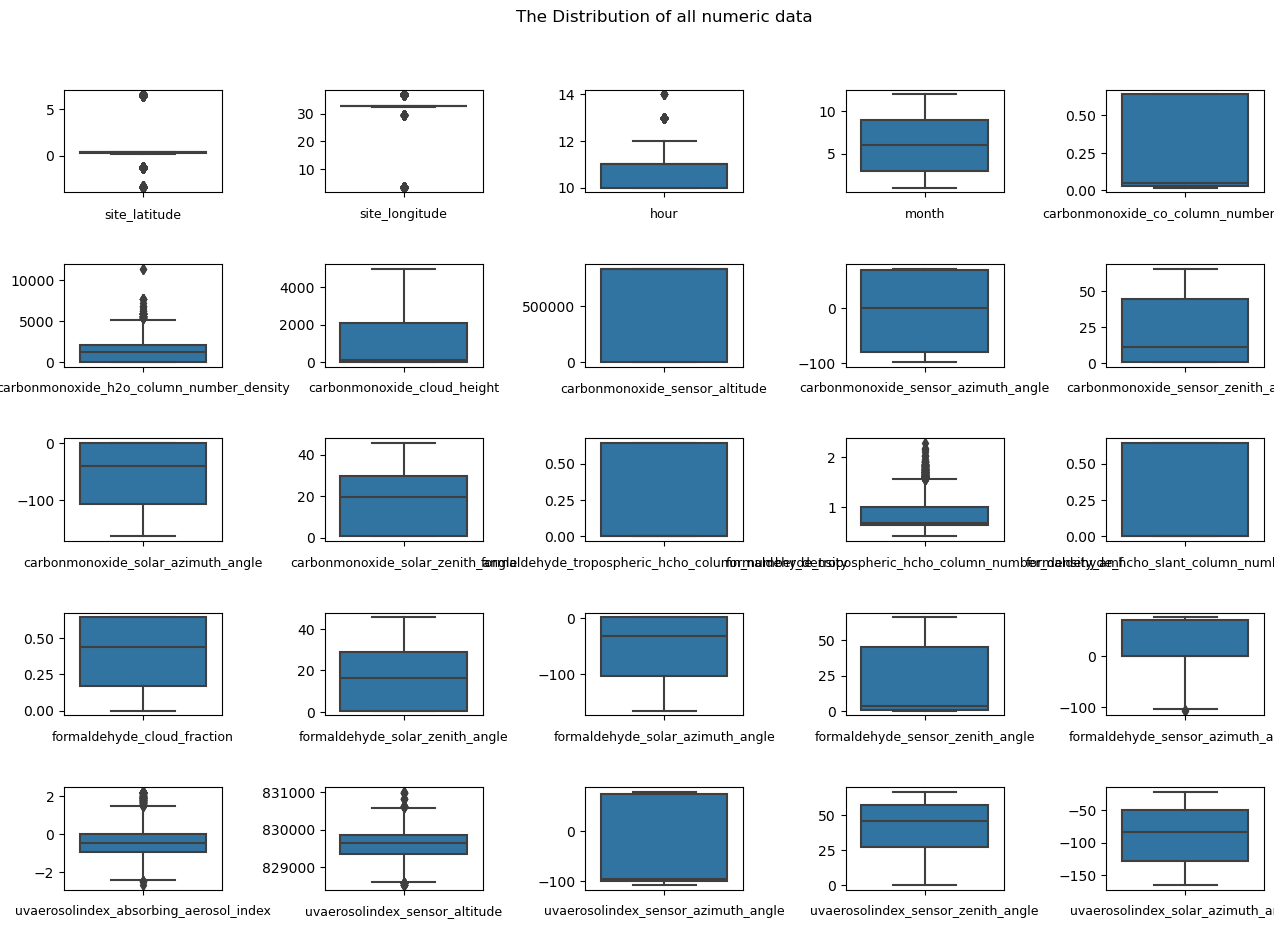

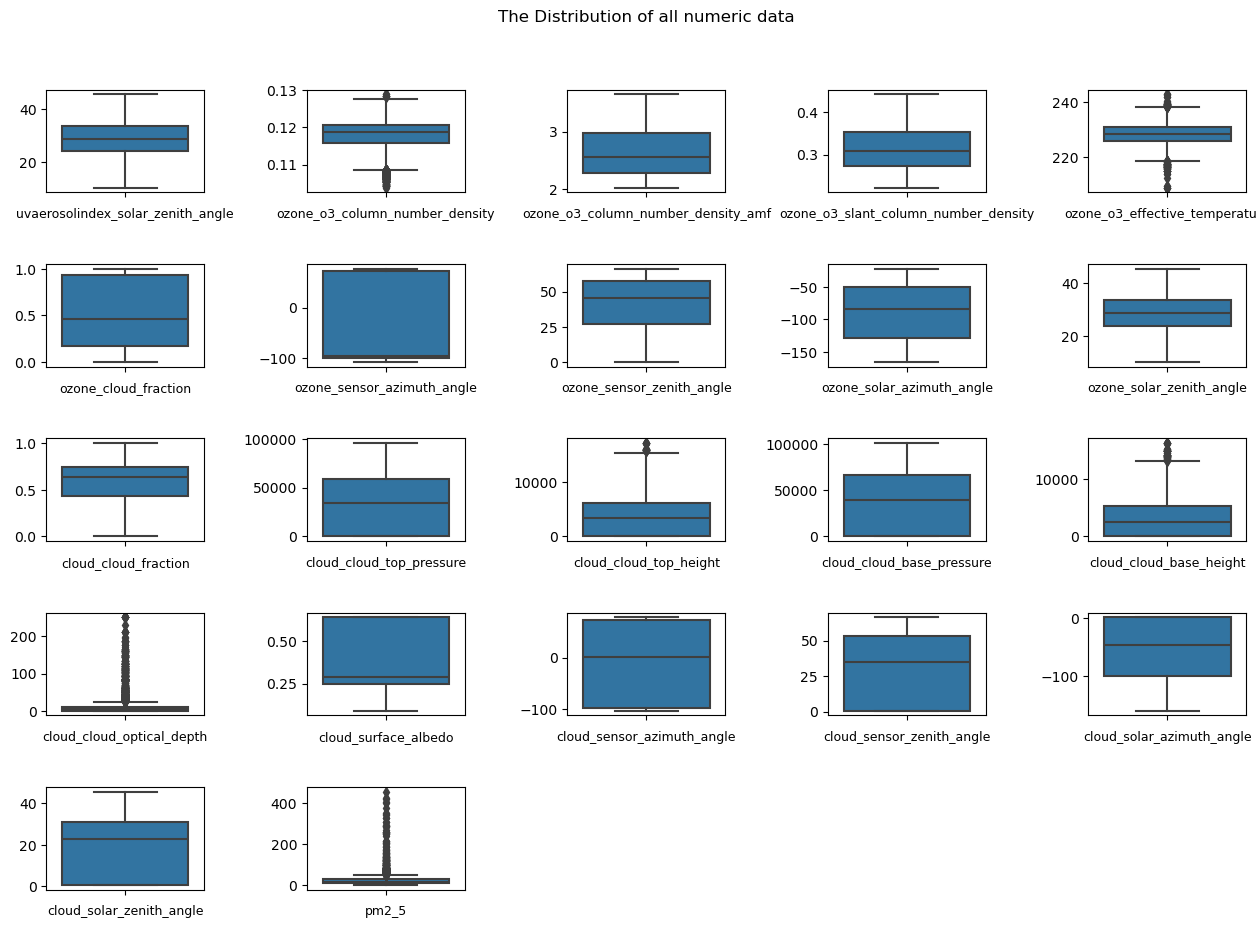

In [10]:
def NumericDataBoxPlot(start,end):
    i=1
    plt.figure(figsize=(20, 10))
    plt.subplots_adjust(left=0.2,right=0.8,top=0.9,bottom=0.1,wspace=0.65
                        ,hspace=0.7)
    for col in numericDataColumns[start:end]:
        plt.subplot(5,5,i)
        sns.boxplot(y=col, data=working_data)
        plt.ylabel("")
        plt.xlabel(col,fontsize=9)
        i=i+1
    plt.suptitle('The Distribution of all numeric data')
    plt.show()
NumericDataBoxPlot(0,25)
NumericDataBoxPlot(25,47)

#### Getting distribution of the numeric data using histogram

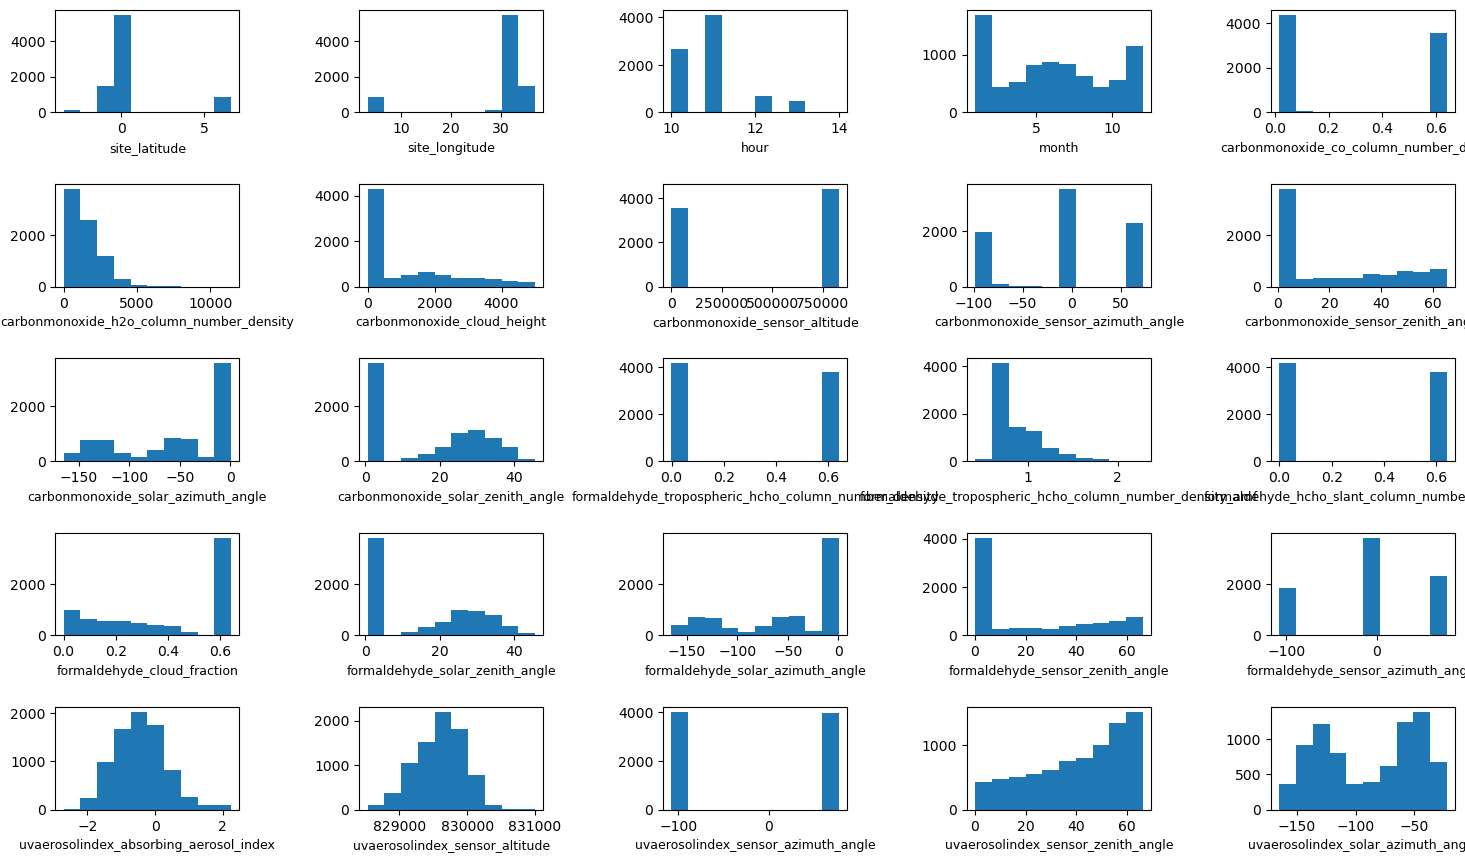

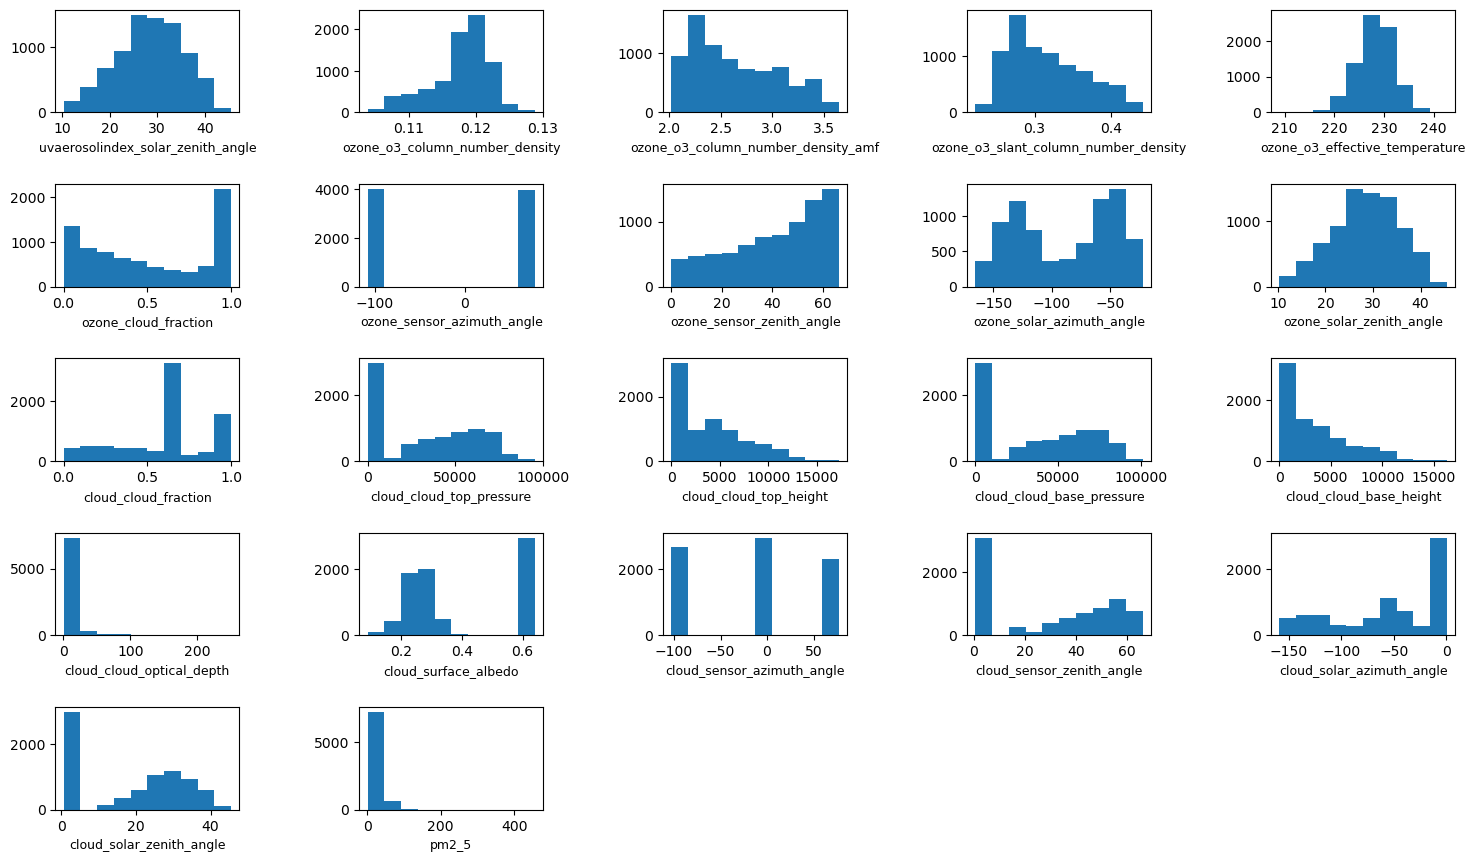

In [11]:
def NumericDataHist(start,end):
    i=1
    plt.figure(figsize=(20, 10))
    plt.subplots_adjust(left=0.1,right=0.8,top=0.9,bottom=0.1,wspace=0.65
                        ,hspace=0.7)
    for col in numericDataColumns[start:end]:
        plt.subplot(5,5,i)
        plt.hist(working_data[col])
        plt.ylabel("")
        plt.xlabel(col,fontsize=9)
        i=i+1
    plt.show()
NumericDataHist(0,25)
NumericDataHist(25,47)

### Getting the distribution of target variable accross the city

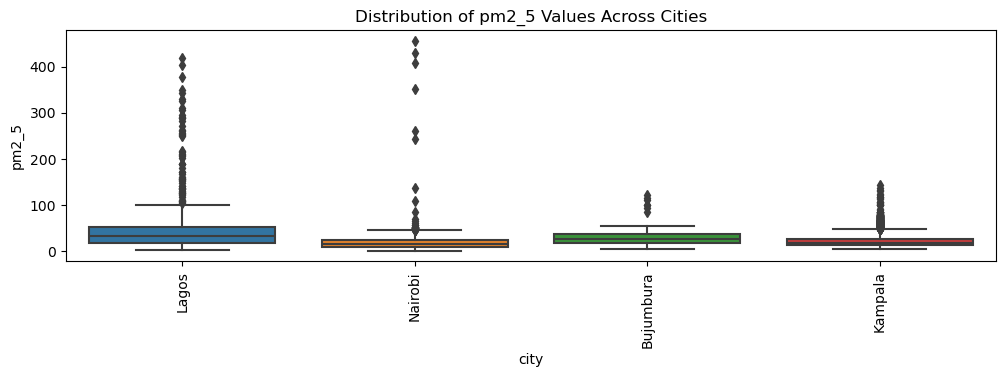

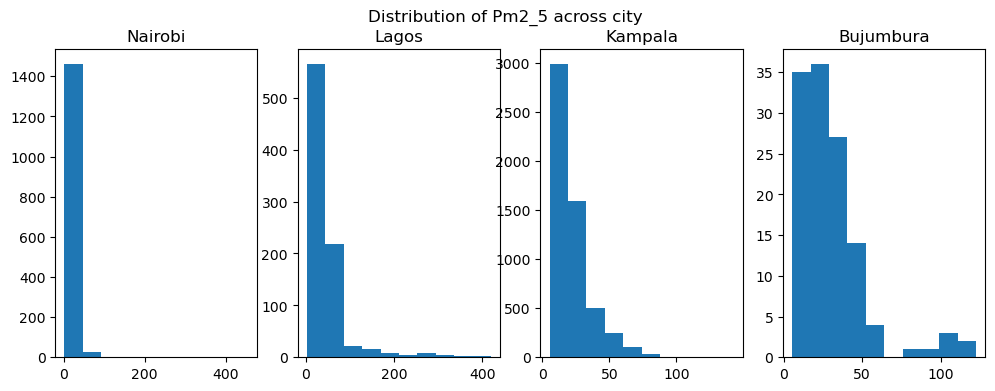

In [12]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='city', y='pm2_5', data=working_data)
plt.title(f'Distribution of pm2_5 Values Across Cities')
plt.xticks(rotation=90)
plt.show()
cityName=set(working_data['city'])
plt.figure(figsize=(12, 4))
i=1
for city in cityName:   
    plt.subplot(1,4,i)
    plt.hist(working_data[working_data['city']==city]['pm2_5'])
    plt.title(city)
    i=i+1
plt.suptitle(f"Distribution of Pm2_5 across city")
plt.show()

    

#### Adding months, Days and weeks column to working_data

In [24]:
working_data['date']=pd.to_datetime(working_data['date'])
working_data['months'] = pd.to_datetime(working_data['date']).dt.month_name()
working_data['years']=working_data['date'].dt.year
working_data['Days']=working_data['date'].dt.days_in_month
working_data['weeks']=working_data['date'].dt.day_name()

### Plotting distribution of target column across months

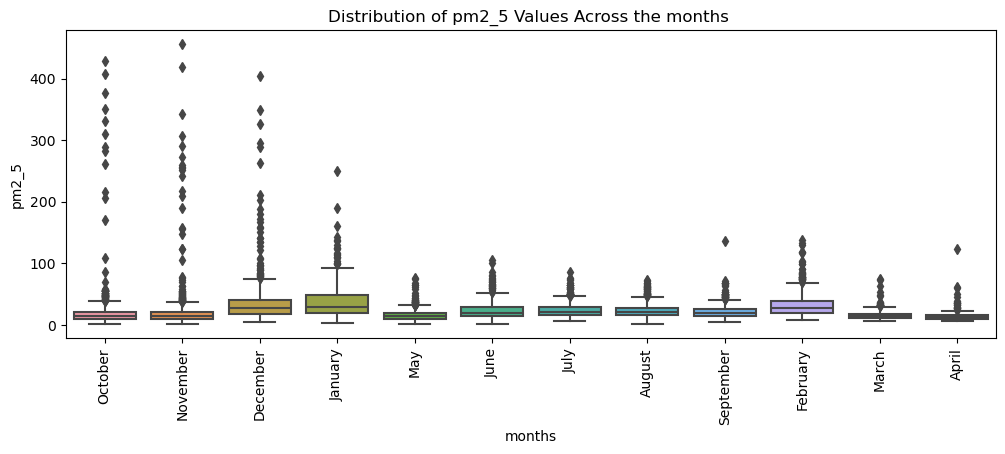

In [14]:

plt.figure(figsize=(12, 4))
sns.boxplot(x='months', y='pm2_5', data=working_data)
plt.title(f'Distribution of {col} Values Across the months ')
plt.xticks(rotation=90)
plt.show()

#### Finding the Outlier and replacing it in each column

In [26]:
### Creating functions to get the Outlier boundary
def Outlier(data):
    Q3=np.percentile(data,75)
    Q1=np.percentile(data,25)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return [lower,upper]

def ChangeOutlier(data):
    lower=Outlier(data)[0]
    upper=Outlier(data)[1]
    newData=np.where(data>upper,np.mean(data),data)
    newData=np.where(newData<lower,np.mean(data),newData)
    return newData
for col in numericDataColumns:
    working_data[col]=ChangeOutlier(working_data[col])


#### Removing Outliers from the target variable

In [16]:
OutlierBound=Outlier(working_data['pm2_5'])
lower=OutlierBound[0]
upper=OutlierBound[1]
working_data=working_data[working_data['pm2_5']>=lower]
working_data=working_data[working_data['pm2_5']<=upper]


#### Creating a scatter chart to see if there is any relation

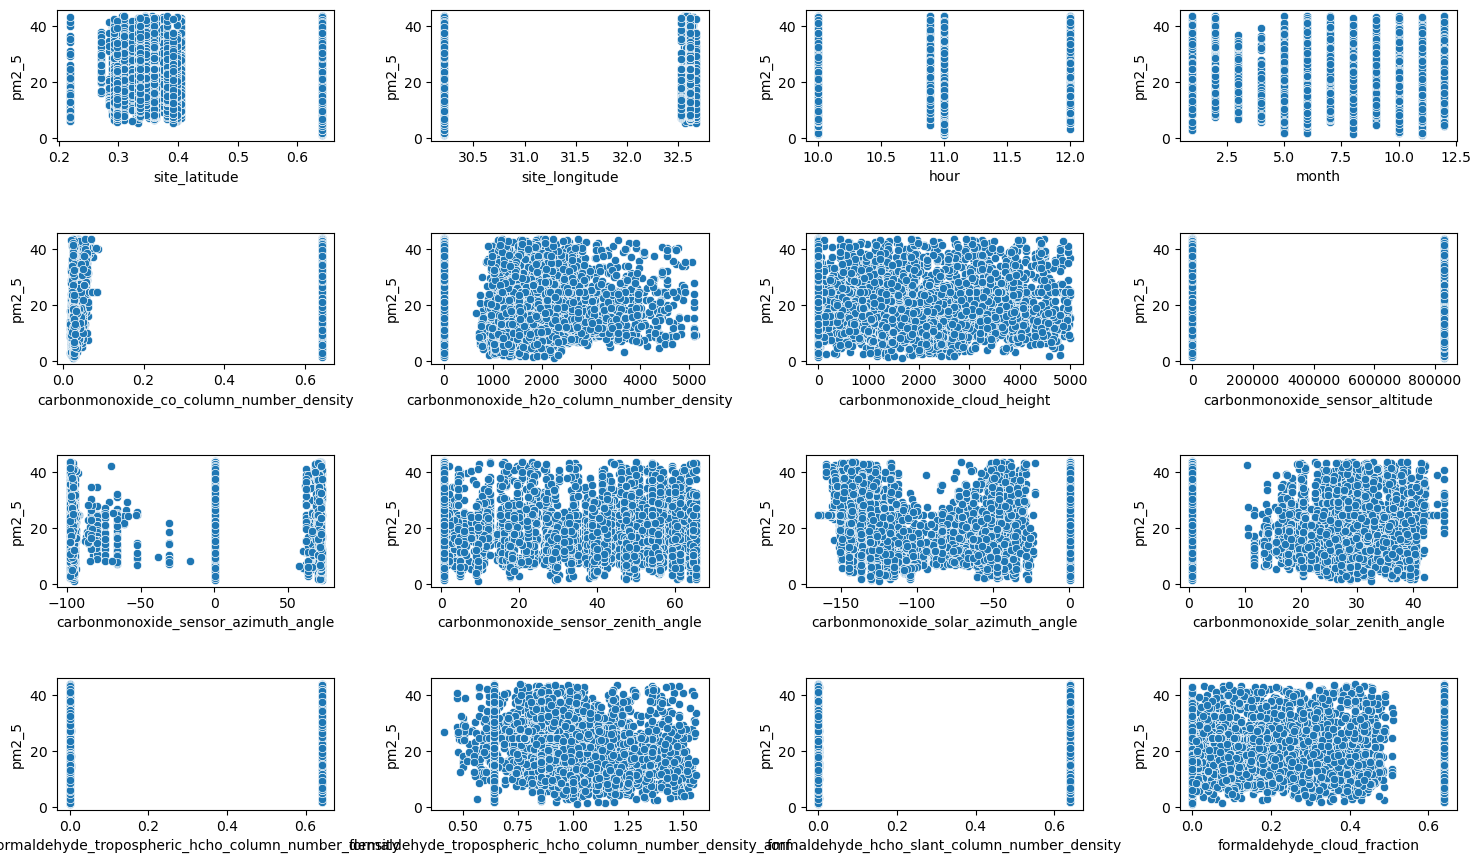

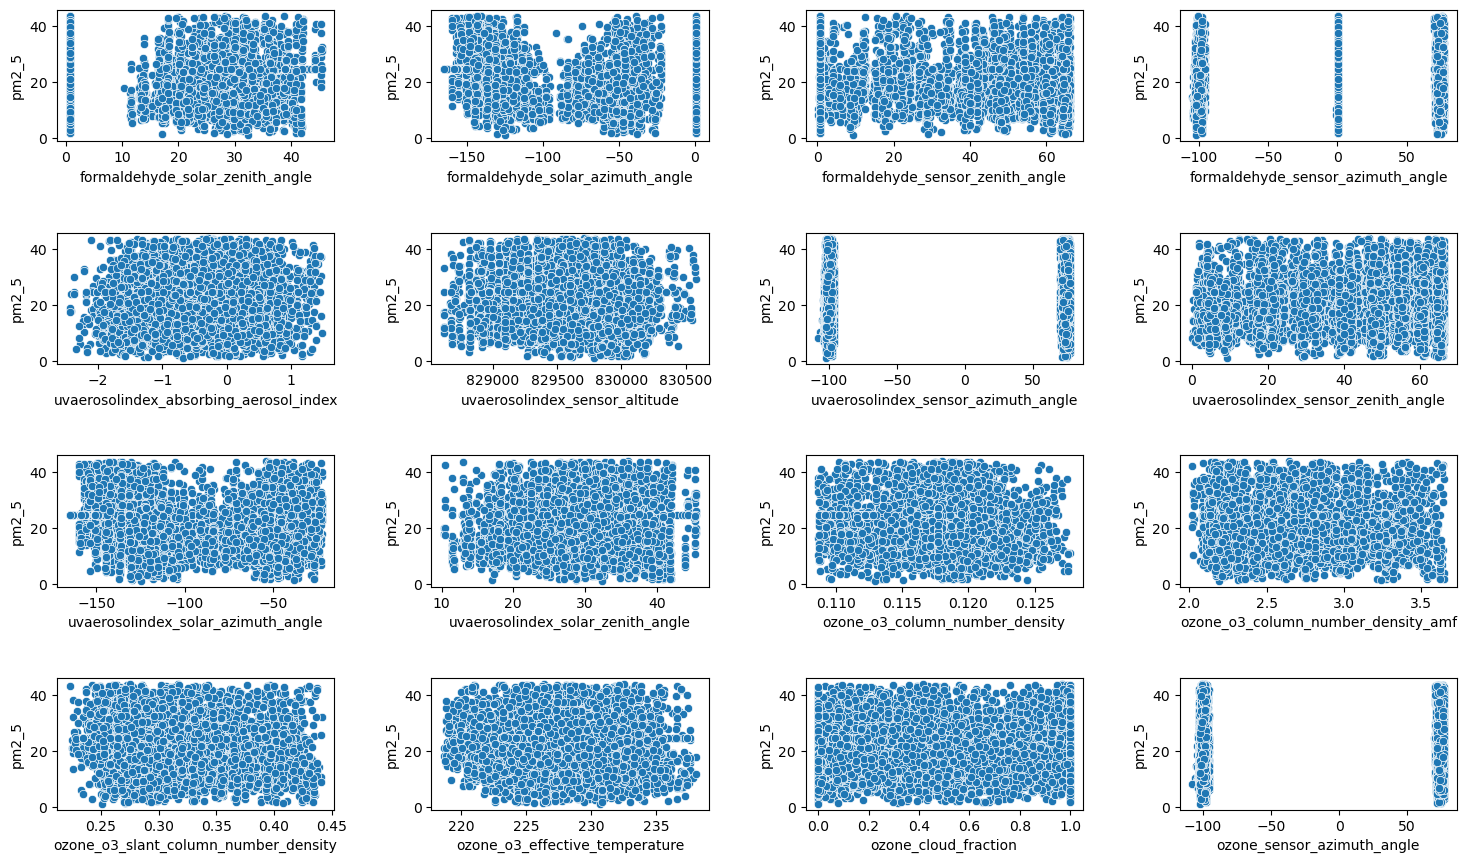

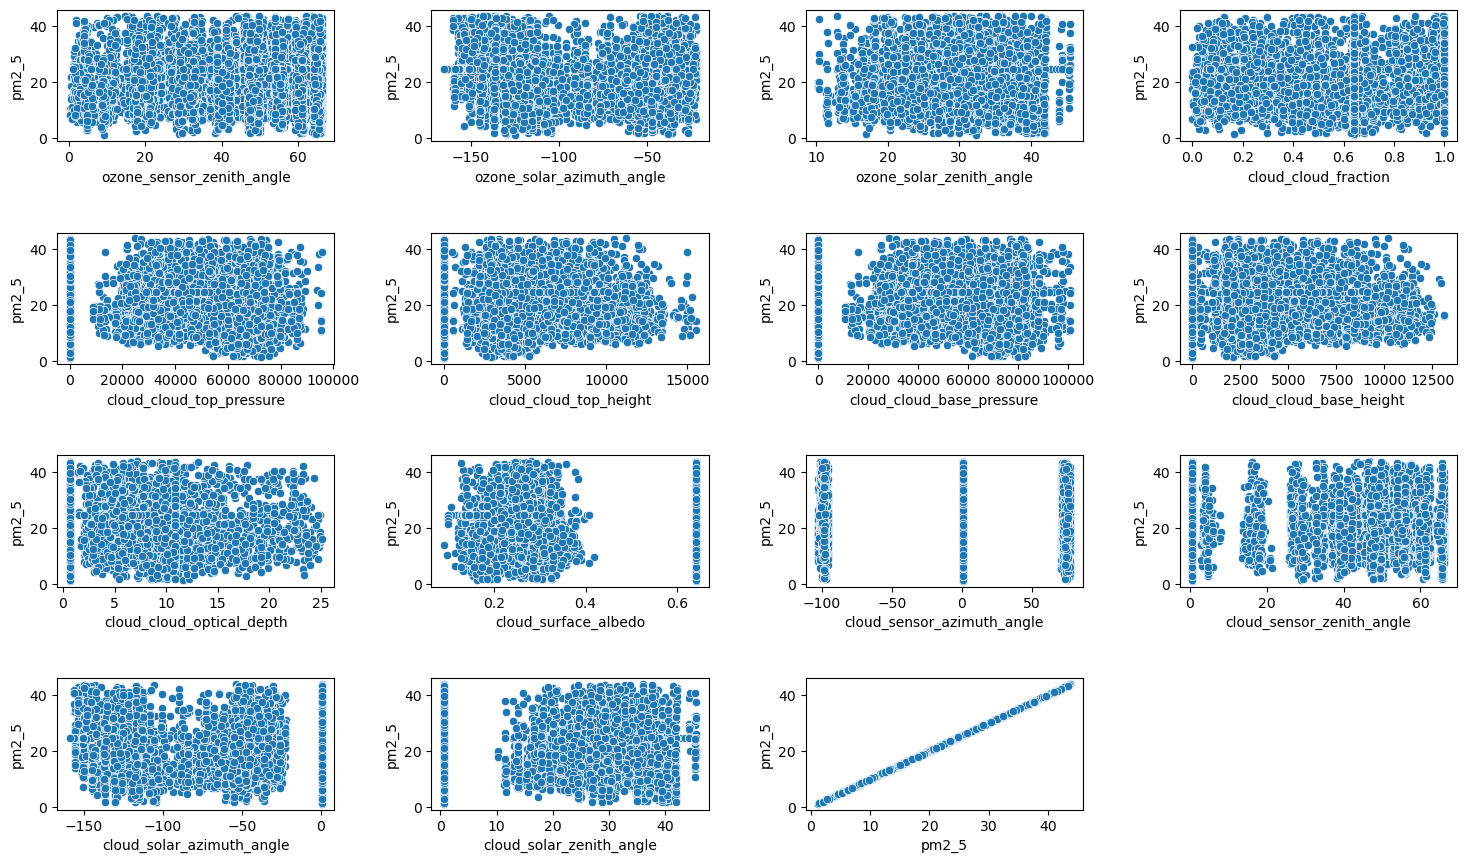

In [17]:
def Scatter(start,end):
    plt.figure(figsize=(20, 10))
    plt.subplots_adjust(left=0.1,right=0.8,top=0.9,bottom=0.1,wspace=0.35
                        ,hspace=0.7)
    i=1
    for col in numericDataColumns[start:end]:
        plt.subplot(4,4,i)
        sns.scatterplot(y=working_data['pm2_5'],x=working_data[col])
        i=i+1
    plt.show()
Scatter(0,16)
Scatter(16,32)
Scatter(32,48)

#### Getting correlation coefficient of all the numeric data

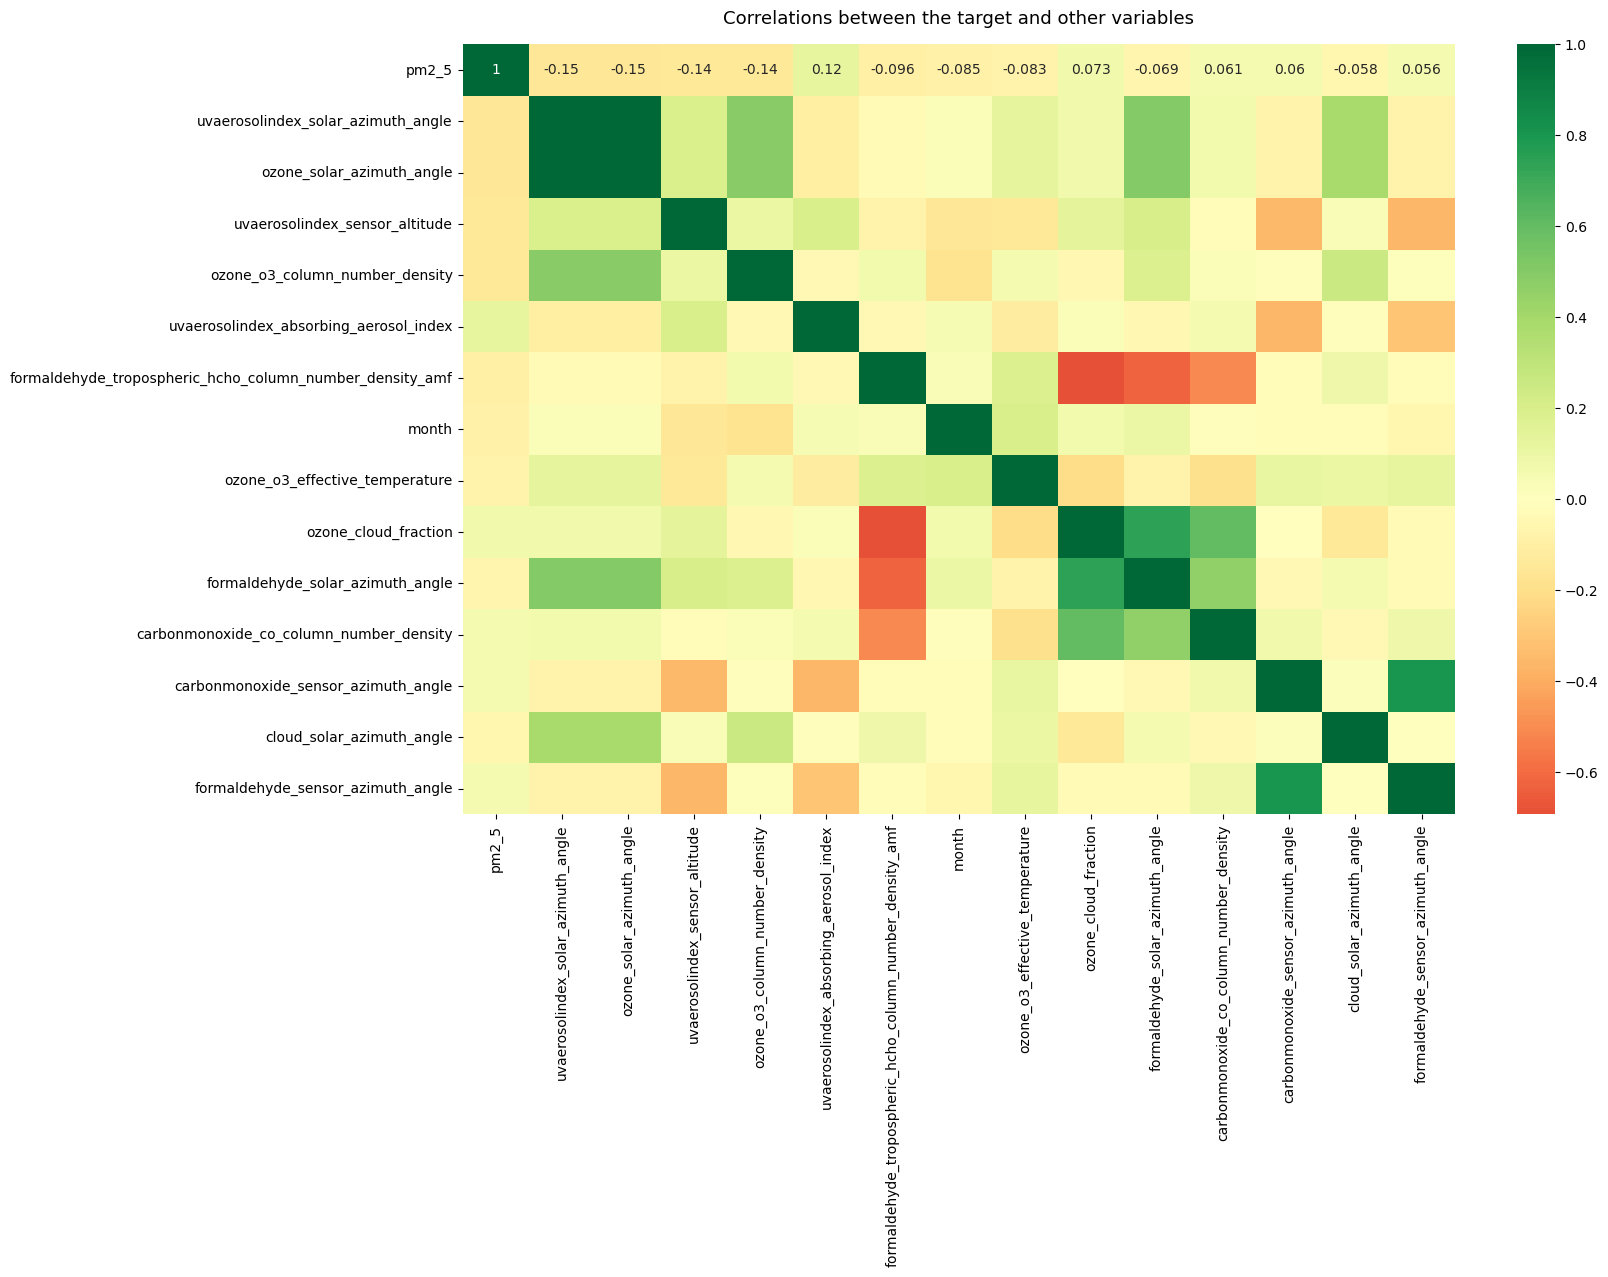

In [18]:
plt.figure(figsize=(16,10))
top10_corrs = abs(working_data[numericDataColumns].corr()['pm2_5']).sort_values(ascending = False).head(15)
corr = working_data[numericDataColumns][list(top10_corrs.index)].corr()
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlations between the target and other variables', pad = 15, fontdict={'size': 13})
plt.show()

##### Divide the data set into features and target variable 

In [19]:
X=working_data[numericDataColumns].drop(['pm2_5'],axis=1)
Y=working_data['pm2_5']

##### Training the model

In [20]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
#081 3114 1550
model = LGBMRegressor()
model.fit(X_train, y_train)

# Local score
y_pred = model.predict(X_test)

score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10464
[LightGBM] [Info] Number of data points in the train set: 5330, number of used features: 46
[LightGBM] [Info] Start training from score 19.373685
Local RMSE: 5.825813677949928


In [21]:
# Make predictions on the test set
test_df=pd.read_csv('Airqo.csv')
preds = model.predict(test_df[X_test.columns.tolist()])
# Create submission file
sub = pd.DataFrame({'id': test_df['id'], 'pm2_5': preds})
sub.head()

,id,pm2_5
0,id_vjcx08sz91,6.763529
1,id_bkg215syli,23.347818
2,id_oui2pot3qd,13.620506
3,id_9aandqzy4n,8.012283
4,id_ali5x2m4iw,14.719701
